# COMP5318 Assignment 2: Image Classification

### Group number: 34  , SID1: 510251659 , SID2: 510251659  

This notebook includes the code to load the Fashion-MNIST dataset using Keras, and a skeleton for the main sections that should be included in the notebook. Please see the assignment specification for more detail. You may wish to add extra subsections where appropriate. 

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant.

## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## 1. Data loading, preprocessing, and exploration
We have included the code to load the dataset below. Please proceed with your data exploration and preprocessing steps, including creating any relevant data subsets required. The documentation for the data loading function can be accessed [here](https://keras.io/api/datasets/fashion_mnist/).

In [2]:
# Load the Fashion-MNIST dataset training and test sets as numpy arrays
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
#Scale down to range of 0-1
X_train = X_train / 255.
X_test = X_test / 255.

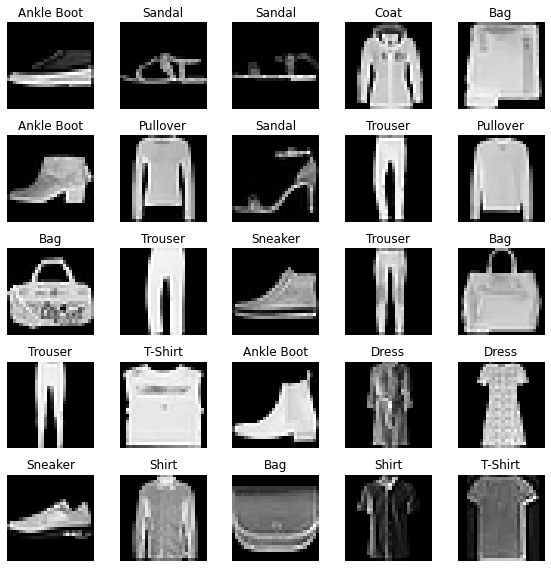

In [4]:
#Visualise examples of the classes
class_names = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(X_train))
    img = X_train[data_idx].reshape([28, 28])
    label = class_names[y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Add an extra dimension to the data
print("The old shape of X_train is ", X_train.shape)
print("The old shape of X_test is ", X_train.shape)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("The new shape of X_train is ", X_train.shape)
print("The new shape of X_test is ", X_test.shape)

The old shape of X_train is  (60000, 28, 28)
The old shape of X_test is  (60000, 28, 28)
The new shape of X_train is  (60000, 28, 28, 1)
The new shape of X_test is  (10000, 28, 28, 1)


## 2. Algorithm design and setup

### k-Nearest Neighbour

In [6]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train.reshape(60000,-1), y_train)

KNeighborsClassifier(n_neighbors=1)

### Fully connected neural network

In [7]:
model_neural_network = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])

In [8]:
model_neural_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_neural_network.compile(loss='sparse_categorical_crossentropy',
optimizer='adam',metrics=['accuracy'])

model_ann_train_results = model_neural_network.fit(X_train, y_train, batch_size=64,
epochs=10)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.8044
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3996 - accuracy: 0.8580
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3620 - accuracy: 0.8691
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3378 - accuracy: 0.8775
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3237 - accuracy: 0.8812
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3101 - accuracy: 0.8866
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2981 - accuracy: 0.8908
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2882 - accuracy: 0.8948
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2804 - accuracy: 0.8967
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2719 - accuracy: 0.8995

### Convolutional neural network

In [10]:
#Establishing the Convolutional Neural Network
model_cnn = keras.Sequential([
    #Input shape
    keras.Input(shape=(28,28,1)),
    #Layer 1
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    #Layer 2
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),    
    #Flattening & Output Layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])

In [11]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [12]:
model_cnn.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [13]:
model_cnn_train_results = model_cnn.fit(X_train, y_train, batch_size=128,
epochs=10)

Epoch 1/10
469/469 [==============================] - 19s 41ms/step - loss: 0.7427 - accuracy: 0.7340
Epoch 2/10
469/469 [==============================] - 20s 42ms/step - loss: 0.4767 - accuracy: 0.8277
Epoch 3/10
469/469 [==============================] - 21s 44ms/step - loss: 0.4291 - accuracy: 0.8467
Epoch 4/10
469/469 [==============================] - 22s 47ms/step - loss: 0.4013 - accuracy: 0.8556
Epoch 5/10
469/469 [==============================] - 24s 50ms/step - loss: 0.3787 - accuracy: 0.86480s - loss: 0.3786 - accuracy: 0.
Epoch 6/10
469/469 [==============================] - 25s 53ms/step - loss: 0.3618 - accuracy: 0.8706
Epoch 7/10
469/469 [==============================] - 27s 58ms/step - loss: 0.3523 - accuracy: 0.8726
Epoch 8/10
469/469 [==============================] - 26s 56ms/step - loss: 0.3450 - accuracy: 0.8776
Epoch 9/10
469/469 [==============================] - 28s 59ms/step - loss: 0.3368 - accuracy: 0.8790
Epoch 10/10
469/469 [=============================

## 3. Hyperparameter tuning

### k-Nearest Neighbour

In [14]:
#Hyperparameter tuning for kNN
knn_model_gridsearch = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid={'n_neighbors':[3,5,7],
                                      'weights':['uniform','distance']}
                           ,verbose=3)

knn_model_gridsearch.fit(X_train.reshape(60000,-1), y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................n_neighbors=3, weights=uniform; total time=  31.4s
[CV 2/5] END .................n_neighbors=3, weights=uniform; total time=  29.1s
[CV 3/5] END .................n_neighbors=3, weights=uniform; total time=  31.6s
[CV 4/5] END .................n_neighbors=3, weights=uniform; total time=  29.7s
[CV 5/5] END .................n_neighbors=3, weights=uniform; total time=  31.0s
[CV 1/5] END ................n_neighbors=3, weights=distance; total time=  30.5s
[CV 2/5] END ................n_neighbors=3, weights=distance; total time=  32.1s
[CV 3/5] END ................n_neighbors=3, weights=distance; total time=  37.3s
[CV 4/5] END ................n_neighbors=3, weights=distance; total time=  34.2s
[CV 5/5] END ................n_neighbors=3, weights=distance; total time=  29.6s
[CV 1/5] END .................n_neighbors=5, weights=uniform; total time=  34.6s
[CV 2/5] END .................n_neighbors=5, weig

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [15]:
print(knn_model_gridsearch.best_params_)
print(knn_model_gridsearch.best_score_)

{'n_neighbors': 5, 'weights': 'distance'}
0.8553


### Fully connected neural network

In [16]:
#MLP Neural Network Hyperparameter tuning initialisation
def mlp_model_CV(activation, learning_rate):
    #Model Initialisation
    mlp_model_cv = keras.Sequential()
    #Input layer
    mlp_model_cv.add(keras.layers.Flatten(input_shape=[28, 28, 1]))
    #Hidden Layer 1
    mlp_model_cv.add(keras.layers.Dense(50, activation=activation))
    #Hidden Layer 2
    mlp_model_cv.add(keras.layers.Dense(50, activation=activation))
    #Output Layer
    mlp_model_cv.add(keras.layers.Dense(10, activation='softmax'))
    #Compiling the model
    mlp_model_cv.compile(tf.keras.optimizers.Adam(learning_rate=learning_rate),
                         loss='sparse_categorical_crossentropy',
                         metrics = ['accuracy'])
    return mlp_model_cv

In [17]:
#Hyperparameter tuning for CNN
model_mlp = keras.wrappers.scikit_learn.KerasClassifier(build_fn=mlp_model_CV, batch_size=25)
mlp_model_gridsearch = GridSearchCV(estimator=model_mlp, 
                                    param_grid={'activation':[None, 'relu', 'sigmoid'],
                                               'learning_rate':[0.001,0.01,0.1]}
                                   ,verbose=3)
mlp_model_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
480/480 [==============================] - 0s 992us/step - loss: 0.4836 - accuracy: 0.8316
[CV 1/5] END ...........activation=None, learning_rate=0.001; total time=   4.4s
480/480 [==============================] - 1s 1ms/step - loss: 0.4782 - accuracy: 0.8317
[CV 2/5] END ...........activation=None, learning_rate=0.001; total time=   4.3s
480/480 [==============================] - 1s 2ms/step - loss: 0.4615 - accuracy: 0.8414
[CV 3/5] END ...........activation=None, learning_rate=0.001; total time=   6.4s
480/480 [==============================] - 1s 1ms/step - loss: 0.5450 - accuracy: 0.8238
[CV 4/5] END ...........activation=None, learning_rate=0.001; total time=   6.2s
480/480 [==============================] - 1s 1ms/step - loss: 0.4600 - accuracy: 0.8374: 0s - loss: 0.4508 - ac
[CV 5/5] END ...........activation=None, learning_rate=0.001; total time=   6.3s
480/480 [==============================] - 1s 1ms/step - loss: 0

480/480 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8369
[CV 1/5] END ........activation=sigmoid, learning_rate=0.001; total time=   4.3s
480/480 [==============================] - 0s 932us/step - loss: 0.4604 - accuracy: 0.8367
[CV 2/5] END ........activation=sigmoid, learning_rate=0.001; total time=   4.2s
480/480 [==============================] - 1s 1ms/step - loss: 0.4631 - accuracy: 0.8431: 0s - loss: 0.4675 - ac
[CV 3/5] END ........activation=sigmoid, learning_rate=0.001; total time=   4.7s
480/480 [==============================] - 1s 1ms/step - loss: 0.4689 - accuracy: 0.8377
[CV 4/5] END ........activation=sigmoid, learning_rate=0.001; total time=   4.5s
480/480 [==============================] - 0s 983us/step - loss: 0.4576 - accuracy: 0.8363
[CV 5/5] END ........activation=sigmoid, learning_rate=0.001; total time=   4.2s
480/480 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.8214
[CV 1/5] END .........activation=

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002CF0181E790>,
             param_grid={'activation': [None, 'relu', 'sigmoid'],
                         'learning_rate': [0.001, 0.01, 0.1]},
             verbose=3)

In [18]:
print(mlp_model_gridsearch.best_params_)
print(mlp_model_gridsearch.best_score_)

{'activation': 'relu', 'learning_rate': 0.001}
0.8460333228111268


In [19]:
test=mlp_model_gridsearch.cv_results_
test

{'mean_fit_time': array([4.70113883, 3.76644311, 3.7716876 , 4.58145227, 4.00947294,
        3.89281869, 3.76121087, 3.62541323, 3.75894008]),
 'std_fit_time': array([0.88390884, 0.25986326, 0.17415208, 0.31134356, 0.43838578,
        0.43776764, 0.13478448, 0.15394672, 0.19928468]),
 'mean_score_time': array([0.90430903, 0.70475206, 0.7943172 , 0.88887224, 0.78270187,
        0.77868171, 0.74433613, 0.76098838, 0.71792603]),
 'std_score_time': array([0.1734559 , 0.04450491, 0.13331904, 0.14842531, 0.06500624,
        0.0889806 , 0.06356341, 0.12904801, 0.04971428]),
 'param_activation': masked_array(data=[None, None, None, 'relu', 'relu', 'relu', 'sigmoid',
                    'sigmoid', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.001, 0.01, 0.1, 0.001, 0.01, 0.1, 0.001, 0.01, 0.1],
              mask=[False, False, Fa

### Convolutional neural network

In [20]:
#CNN Hyperparameter tuning initialisation
def cnn_model_CV(kernel_size, strides, learning_rate):
    #Model Initialisation
    cnn_model_cv = keras.Sequential()
    #Layer 1
    cnn_model_cv.add(keras.layers.Conv2D(64, kernel_size=kernel_size, activation='relu', 
                                         input_shape=[28, 28, 1]))
    cnn_model_cv.add(keras.layers.MaxPool2D(pool_size=2, strides=strides))
    #Layer 2
    cnn_model_cv.add(keras.layers.Conv2D(64, kernel_size=kernel_size, activation='relu'))
    cnn_model_cv.add(keras.layers.MaxPool2D(pool_size=2, strides=strides))
    #Flattening
    cnn_model_cv.add(keras.layers.Flatten())
    #Output layer
    cnn_model_cv.add(keras.layers.Dropout(0.5))
    cnn_model_cv.add(keras.layers.Dense(10, activation='softmax'))
    #Compiling the model
    cnn_model_cv.compile(tf.keras.optimizers.Adam(learning_rate=learning_rate),
                         loss='sparse_categorical_crossentropy',
                         metrics = ['accuracy'])
    return cnn_model_cv

In [21]:
#Hyperparameter tuning for CNN
model_cnn = keras.wrappers.scikit_learn.KerasClassifier(build_fn=cnn_model_CV, batch_size=25)
cnn_model_gridsearch = GridSearchCV(estimator=model_cnn, 
                                    param_grid={'kernel_size':[3,4],
                                               'strides':[2,4],
                                               'learning_rate':[0.001,0.01,0.1]}
                                   ,verbose=3)
cnn_model_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
480/480 [==============================] - 4s 8ms/step - loss: 0.3668 - accuracy: 0.8728
[CV 1/5] END ..kernel_size=3, learning_rate=0.001, strides=2; total time= 1.1min
480/480 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.85 - 4s 9ms/step - loss: 0.3898 - accuracy: 0.8548
[CV 2/5] END ..kernel_size=3, learning_rate=0.001, strides=2; total time= 1.0min
480/480 [==============================] - 5s 10ms/step - loss: 0.3691 - accuracy: 0.8707
[CV 3/5] END ..kernel_size=3, learning_rate=0.001, strides=2; total time= 1.1min
480/480 [==============================] - 4s 8ms/step - loss: 0.3907 - accuracy: 0.8615
[CV 4/5] END ..kernel_size=3, learning_rate=0.001, strides=2; total time= 1.0min
480/480 [==============================] - 4s 8ms/step - loss: 0.3918 - accuracy: 0.8609
[CV 5/5] END ..kernel_size=3, learning_rate=0.001, strides=2; total time= 1.0min
480/480 [==============================] - 3s 

480/480 [==============================] - 2s 5ms/step - loss: 0.3932 - accuracy: 0.8572
[CV 1/5] END ..kernel_size=4, learning_rate=0.001, strides=2; total time=  37.6s
480/480 [==============================] - 3s 5ms/step - loss: 0.4043 - accuracy: 0.8553
[CV 2/5] END ..kernel_size=4, learning_rate=0.001, strides=2; total time=  40.2s
480/480 [==============================] - 3s 6ms/step - loss: 0.4162 - accuracy: 0.8484
[CV 3/5] END ..kernel_size=4, learning_rate=0.001, strides=2; total time=  40.0s
480/480 [==============================] - 3s 6ms/step - loss: 0.4006 - accuracy: 0.8570
[CV 4/5] END ..kernel_size=4, learning_rate=0.001, strides=2; total time=  46.9s
480/480 [==============================] - 3s 6ms/step - loss: 0.3925 - accuracy: 0.8573
[CV 5/5] END ..kernel_size=4, learning_rate=0.001, strides=2; total time=  43.5s
480/480 [==============================] - 2s 3ms/step - loss: 0.5102 - accuracy: 0.8180
[CV 1/5] END ..kernel_size=4, learning_rate=0.001, strides=4;

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002CF0181ED00>,
             param_grid={'kernel_size': [3, 4],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'strides': [2, 4]},
             verbose=3)

In [22]:
print('The best parameters of the CNN model are: ')
print(cnn_model_gridsearch.best_params_)
print(cnn_model_gridsearch.best_score_)

The best parameters of the CNN model are: 
{'kernel_size': 3, 'learning_rate': 0.001, 'strides': 2}
0.8641499996185302


## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### k-Nearest Neighbour

In [23]:
#Final model for kNN
knn_model_final = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model_final.fit(X_train.reshape(60000,-1), y_train)

KNeighborsClassifier(weights='distance')

In [24]:
#Testing the kNN model
y_pred_knn=knn_model_final.predict(X_test.reshape(10000,-1))
knn_accuracy_score = accuracy_score(y_test, y_pred_knn)
print("Test accuracy score for final kNN model is:, {knn_accuracy_score:.4f}")

Test accuracy score for final kNN model is:, {knn_accuracy_score:.4f}


### Fully connected neural network

In [25]:
#MLP Final Model
#Model Initialisation
mlp_model_final = keras.Sequential()

#Input layer
mlp_model_final.add(keras.layers.Flatten(input_shape=[28, 28, 1]))

#Hidden Layer 1
mlp_model_final.add(keras.layers.Dense(50, activation='relu'))

#Hidden Layer 2
mlp_model_final.add(keras.layers.Dense(50, activation='relu'))

#Output Layer
mlp_model_final.add(keras.layers.Dense(10, activation='softmax'))

#Compiling the model
mlp_model_final.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics = ['accuracy'])

In [26]:
#Training the MLP
mlp_model_final.fit(X_train, y_train, batch_size=25, epochs=10)

Epoch 1/10
2400/2400 [==============================] - 2s 821us/step - loss: 0.5144 - accuracy: 0.8185
Epoch 2/10
2400/2400 [==============================] - 2s 787us/step - loss: 0.3805 - accuracy: 0.8620
Epoch 3/10
2400/2400 [==============================] - 2s 781us/step - loss: 0.3459 - accuracy: 0.8731
Epoch 4/10
2400/2400 [==============================] - 2s 753us/step - loss: 0.3247 - accuracy: 0.8809
Epoch 5/10
2400/2400 [==============================] - 2s 770us/step - loss: 0.3069 - accuracy: 0.8864
Epoch 6/10
2400/2400 [==============================] - 2s 752us/step - loss: 0.2948 - accuracy: 0.8911
Epoch 7/10
2400/2400 [==============================] - 2s 751us/step - loss: 0.2839 - accuracy: 0.8942
Epoch 8/10
2400/2400 [==============================] - 2s 765us/step - loss: 0.2759 - accuracy: 0.8971
Epoch 9/10
2400/2400 [==============================] - 2s 778us/step - loss: 0.2661 - accuracy: 0.9028
Epoch 10/10
2400/2400 [==============================] - 2s 761u

In [27]:
#Testing and evaluating the mlp model
loss_mlp, accuracy_mlp = mlp_model_final.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy_mlp:.4f}")

313/313 [==============================] - 0s 640us/step - loss: 0.3547 - accuracy: 0.8780
Accuracy on test data: 0.8780


### Convolutional neural network

In [28]:
#CNN Final Model
#Model Initialisation
cnn_model_final = keras.Sequential()
#Layer 1
cnn_model_final.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', 
                                     input_shape=[28, 28, 1]))
cnn_model_final.add(keras.layers.MaxPool2D(pool_size=2, strides=2))

#Second Layer
cnn_model_final.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
cnn_model_final.add(keras.layers.MaxPool2D(pool_size=2, strides=2))

#Flattening
cnn_model_final.add(keras.layers.Flatten())

#Output layer
cnn_model_final.add(keras.layers.Dropout(0.5))
cnn_model_final.add(keras.layers.Dense(10, activation='softmax'))

#Compiling the model
cnn_model_final.compile(tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss='sparse_categorical_crossentropy',
                     metrics = ['accuracy'])

In [29]:
#Training the CNN
cnn_model_final.fit(X_train, y_train, batch_size=25, epochs=10)

Epoch 1/10
2400/2400 [==============================] - 36s 15ms/step - loss: 0.5435 - accuracy: 0.8036
Epoch 2/10
2400/2400 [==============================] - 39s 16ms/step - loss: 0.4675 - accuracy: 0.8295
Epoch 3/10
2400/2400 [==============================] - 38s 16ms/step - loss: 0.4600 - accuracy: 0.8335
Epoch 4/10
2400/2400 [==============================] - 41s 17ms/step - loss: 0.4558 - accuracy: 0.8335
Epoch 5/10
2400/2400 [==============================] - 46s 19ms/step - loss: 0.4599 - accuracy: 0.8320
Epoch 6/10
2400/2400 [==============================] - 51s 21ms/step - loss: 0.4573 - accuracy: 0.8324
Epoch 7/10
2400/2400 [==============================] - 48s 20ms/step - loss: 0.4556 - accuracy: 0.83380s - loss: 0.4556 - accuracy: 0.83
Epoch 8/10
2400/2400 [==============================] - 50s 21ms/step - loss: 0.4607 - accuracy: 0.8322
Epoch 9/10
2400/2400 [==============================] - 48s 20ms/step - loss: 0.4546 - accuracy: 0.8346
Epoch 10/10
2400/2400 [=======

In [30]:
#Testing and evaluating the CNN model
loss_cnn, accuracy_cnn = cnn_model_final.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy_cnn:.4f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.4259 - accuracy: 0.8356
Accuracy on test data: 0.8356
